<table style="background-color: transparent;">
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%" align="center"><font size="7" color="#7748a4"> Práctica 5. Algoritmos Cuánticos III</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="black">Computación Cuántica</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="black">2025-2</font></td>
    </tr>
</table>

<p style="text-align:center; font-weight:bold;">Nombre del Alumno: Rosario Vázquez José André</p>
<p style="text-align:center; font-weight:bold;">Núm. Cuenta: 318353351

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\mymatrix}[2]{\left[ \begin{array}{#1} #2\end{array} \right]} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $

<a id="1"></a>
# Desarrollo

#### 1. Determina de qué tipo de función se trata: _constante_ o _balanceada_:

1. Ejecuta la siguiente celda de código, esta definirá una función llamada `bv_oracle()` que no recibe parámetros y devuelve un circuito cuántico que codifica una cadena `s` de $5$ bits.
    1. `bv_oracle()` representa $U_f$ en el algoritmo de Bernstein–Vazirani.
    2. Dibuja el circuito que regresa la función `bv_oracle()`.
2. Implementa todo el algoritmo de Bernstein–Vazirani para determinar la cadena `s`.
    1. Considera que el qubit de más a la derecha ($q_0$) es el qubit auxiliar.
    2. Comprueba la estructura del circuito de $U_f$ dibujando tu circuito. ¿Puedes comprobar si tu resultado es correcto (o no) solo observando este circuito?
    3. Usa el parámetro `inplace=True` del método `compose()` de la clase `QuantumCircuit` para agregar el circuito del oráculo en el punto deseado (paso 3).
3. Realiza la simulación del circuito usando la clase `BasicSimulator` (como en el ejemplo de este Lab5).
   - Está prohibido usar Qiskit Aer (`qiskit-aer`). Muchos ejemplos en internet usan Qiskit Aer, pero no se puede usar en las tareas, así que realiza la adecuación pertinente del código.
4. Responde claramente cuál es la cadena oculta `s`.
   - Usa una celda de markdown, en donde escribas la cadena $s$ tu mismo(a) a modo de conclusión.

##### Celda oculta que define la función `bv_oracle()`

No olvides ejecutar la siguiente celda de código ([ofuscado](https://es.wikipedia.org/wiki/Ofuscaci%C3%B3n#Motivaci%C3%B3n)) para cargar la función del Oracle.

In [1]:
exec(bytes.fromhex('0a66726f6d207169736b697420696d706f7274205175616e74756d436972637569740a0a6465662062765f6f7261636c6528293a0a2020202073203d20223131303130220a202020206e203d206c656e2873290a2020202073203d20735b3a3a2d315d202320726576657274696d6f73206c6120636164656e612079612071756520735f3020657374c3a12061206c6120697a7175696572646120736567c3ba6e20507974686f6e2c7920656e206c61206465726563686120736567c3ba6e205169736b69740a0a2020202063697263756974203d205175616e74756d43697263756974286e202b2031290a20202020636972637569742e6261727269657228290a0a20202020666f72206920696e2072616e6765286e293a0a2020202020202020696620735b695d203d3d202731273a0a202020202020202020202020636972637569742e63782869202b20312c2030290a0a20202020636972637569742e6261727269657228290a2020202072657475726e20636972637569740a20202020'))

##### Dibujando el circuito de la función `bv_oracle()`

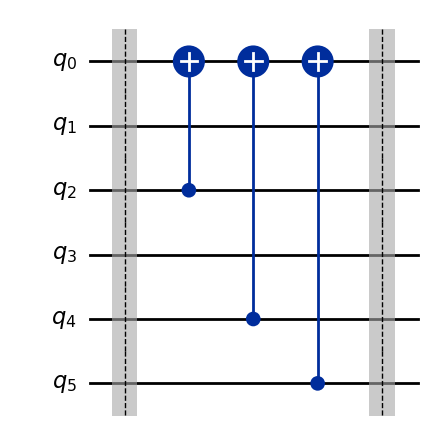

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

# Usando la función del Oraculo del Algoritmo de Bernstein - Vazirani
oraculo = bv_oracle()

#Dibujando Circuitos
oraculo.draw('mpl')

##### Implementando el algoritmo de Bernstein - Vazirani

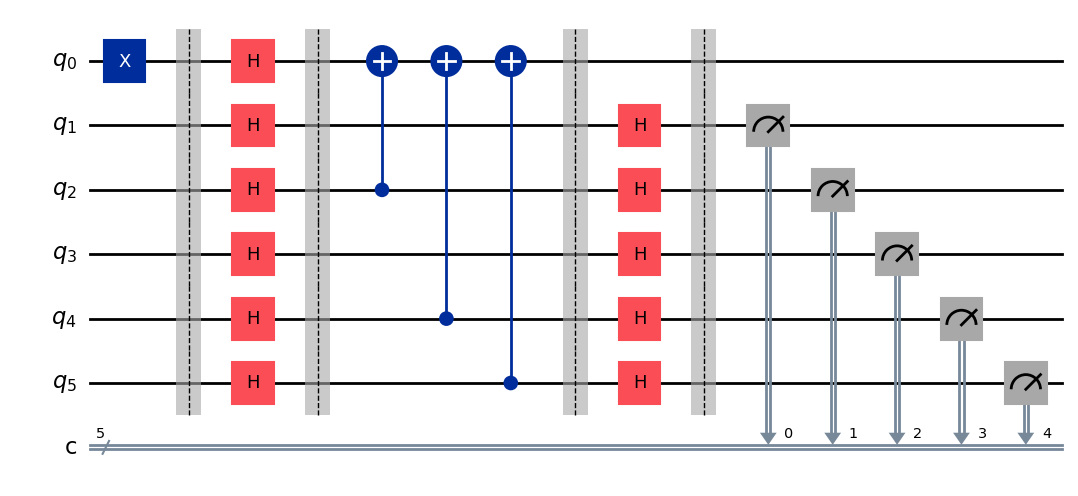

In [3]:
#Definiendo longitud de la cadena a S
n = 5

#Generando circuito con n+1 qbits por el auxiliar.
#Con bits clásicos para mediciones
circuito = QuantumCircuit(n+1, n)

#Paso 1: Preparando registros cuánticos. Se pone el qbit auxiliar en |1>
circuito.x(0)
circuito.barrier()

#Paso 2: Aplicando compuertas Hadamard a cada qbit
for qubit in range(0, n+1):
    circuito.h(qubit)


#Paso 3: Aplicando el oraculo 
circuito_bv = circuito.compose(oraculo)

#Paso 4: Aplicando Hadamard a cada qbit, menos al auxiliar
for qubit in range(1, n+1):
    circuito_bv.h(qubit)

circuito_bv.barrier()

# Mediciones sobre todos los qbits, menos el auxiliar
for i in range(n):
    circuito_bv.measure(i+1, i)

#Dibujando circuito
circuito_bv.draw('mpl')

`¿Puedes comprobar si tu resultado es correcto (o no) solo observando este circuito?`

Sí, se puede comprobar el valor de la cadena $s$ observando el oráculo del circuito.

Todo depende de la presencia y del qubit que afecta la compuerta $CNOT$. La presencia de esta compuerta indica que hay un 1 en la cadena $s$, siempre que el qubit controlado sea el auxiliar ($q_0$). Ahora bien, la posición del qubit que actúa como control determina en qué posición se encuentra ese 1 en la cadena $s$.

La forma de interpretarlo es comenzando desde el qubit $q_5$ hasta el qubit $q_1$, siguiendo el orden estándar de visualización de Qiskit. Por lo tanto, al analizar el circuito se puede determinar que la cadena $s$ es: $11010$.

##### Simulando Circuito del Algoritmo de Bernstein - Vazirani

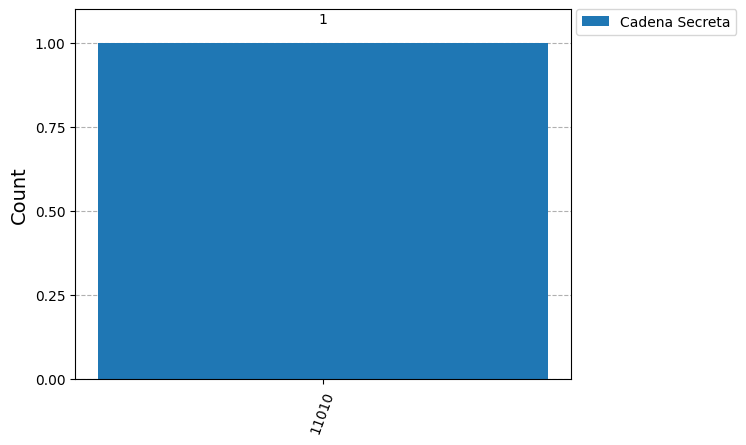

In [4]:
#Usando el simulador básico
sim_basic = BasicSimulator()

#Ejecutar el circuito, una sola vez es suficiente 
job_sampler = sim_basic.run(circuito_bv, shots=1)

#Obteniendo conteos
conteos = job_sampler.result().get_counts()

legend = ["Cadena Secreta"]
plot_histogram([conteos], legend=legend)

##### Usa una celda de markdown, en donde escribas la cadena $s$ tu mismo(a) a modo de conclusión.

El valor de la cadena $s$ es el siguiente: $s = 11010$.

Con la simulación, se pudo obtener el resultado esperado al observar la estructura del circuito. Con la implementación del algoritmo de Bernstein–Vazirani, es posible recuperar la cadena secreta $s$ de forma eficiente, utilizando una sola ejecución del circuito cuántico.

#### 2. Realiza el algoritmo de Grover para $n=5$.

1. Haz una función de oráculo que marque los elementos $|01100\rangle$, $|11001\rangle$ y $|01010\rangle$.
2. Ejecuta el algorimto completo y comprueba que dichos elementos fueron encontrados por el algoritmo de búsqueda de Grover.
    - Realiza los mismos pasos que en el ejemplo de este Lab5.
4. Recuerda que debes determinar el número apropiado de iteraciones a usar en tu algoritmo.
5. Realiza la simulación del circuito usando la clase `StatevectorSampler` (como en el ejemplo de este Lab5).
    - Está prohibido usar Qiskit Aer (`qiskit-aer`). Muchos ejemplos en internet usan Qiskit Aer, pero no se puede usar en las tareas, así que realiza la adecuación pertinente del código.

##### Función de Óraculo que marque los elementos $|01100\rangle$, $|11001\rangle$ y $|01010\rangle$

In [5]:
def Uf_01100_11001_01010(circuit, qreg, ancilla):
    
    # 01100
    circuit.x(qreg[0])
    circuit.x(qreg[1])
    circuit.x(qreg[4])
    circuit.mcx(qreg, ancilla)      
    circuit.x(qreg[0])
    circuit.x(qreg[1])
    circuit.x(qreg[4])
    circuit.barrier()

    # 11001
    circuit.x(qreg[1])
    circuit.x(qreg[2])
    circuit.mcx(qreg, ancilla)
    circuit.x(qreg[1])
    circuit.x(qreg[2])
    circuit.barrier()

    # 01010
    circuit.x(qreg[0])
    circuit.x(qreg[2])
    circuit.x(qreg[4])
    circuit.mcx(qreg, ancilla)
    circuit.x(qreg[0])
    circuit.x(qreg[2])
    circuit.x(qreg[4])

In [6]:
def inversion(circuit, quantum_reg, ancilla):
    circuit.h(quantum_reg)                  
    circuit.x(quantum_reg)                  
    circuit.mcx(quantum_reg, ancilla)       
    circuit.x(quantum_reg)                  
    circuit.x(ancilla)                      
    circuit.h(quantum_reg)                  

##### Ejecución del algoritmo de grover

In [7]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram

def grover(U_f, n, iterations):

    # Creación de qubits y bits clásicos
    qreg = QuantumRegister(n, 'x')
    ancilla = QuantumRegister(1, 'ancilla')
    creg = ClassicalRegister(n, 'medición')

    # Definiendo componentes del circuito
    circuit_gr = QuantumCircuit(qreg, ancilla, creg)
    
    # Paso 1: Aplicando Hadamard a todos los qubits, menos al ancilla
    circuit_gr.h(qreg)
    
    # Paso 2: Iniciar el qubit ancilla. Para poder utilizar el estado |−⟩
    circuit_gr.x(ancilla)
    circuit_gr.h(ancilla)
    circuit_gr.barrier()
    
    # Paso 3: Iteraciones de Grover
    for i in range(iterations): 
        # Consulta con el oráculo
        U_f(circuit_gr, qreg, ancilla)
        circuit_gr.barrier()
        # Inversión de signo
        inversion(circuit_gr, qreg, ancilla)
        circuit_gr.barrier()

    # Paso 4: Regresando el estado del qubit ancilla
    circuit_gr.h(ancilla)
    circuit_gr.x(ancilla)
    circuit_gr.barrier()

    # Mediciones del circuito
    circuit_gr.measure(qreg, creg)

    # Número de muestras
    shots = 2500

    # Simulación con la clase StatevectorSampler
    sampler = StatevectorSampler()                                  
    job_sampler = sampler.run([circuit_gr], shots=shots)
    conteos = job_sampler.result()[0].data.medición.get_counts()  
    
    # Visualización de los resultados de la búsqueda
    for outcome in conteos:
        print("El elemento", outcome, "es observado con probabilidad", conteos[outcome]/shots)

    # Dibujando el circuito
    display(circuit_gr.draw(output='mpl'))

Dada la expresión matemática: $\pi \dfrac{\sqrt{\frac{N}{k}}}{4}$

El número de iteraciones a realizar es: $\pi \dfrac{\sqrt{\frac{2^5}{3}}}{4} = 2.56 \approx 2$

Por lo tanto, se van a realizar $2$ iteraciones

El elemento 01100 es observado con probabilidad 0.3288
El elemento 11001 es observado con probabilidad 0.3444
El elemento 01010 es observado con probabilidad 0.3268


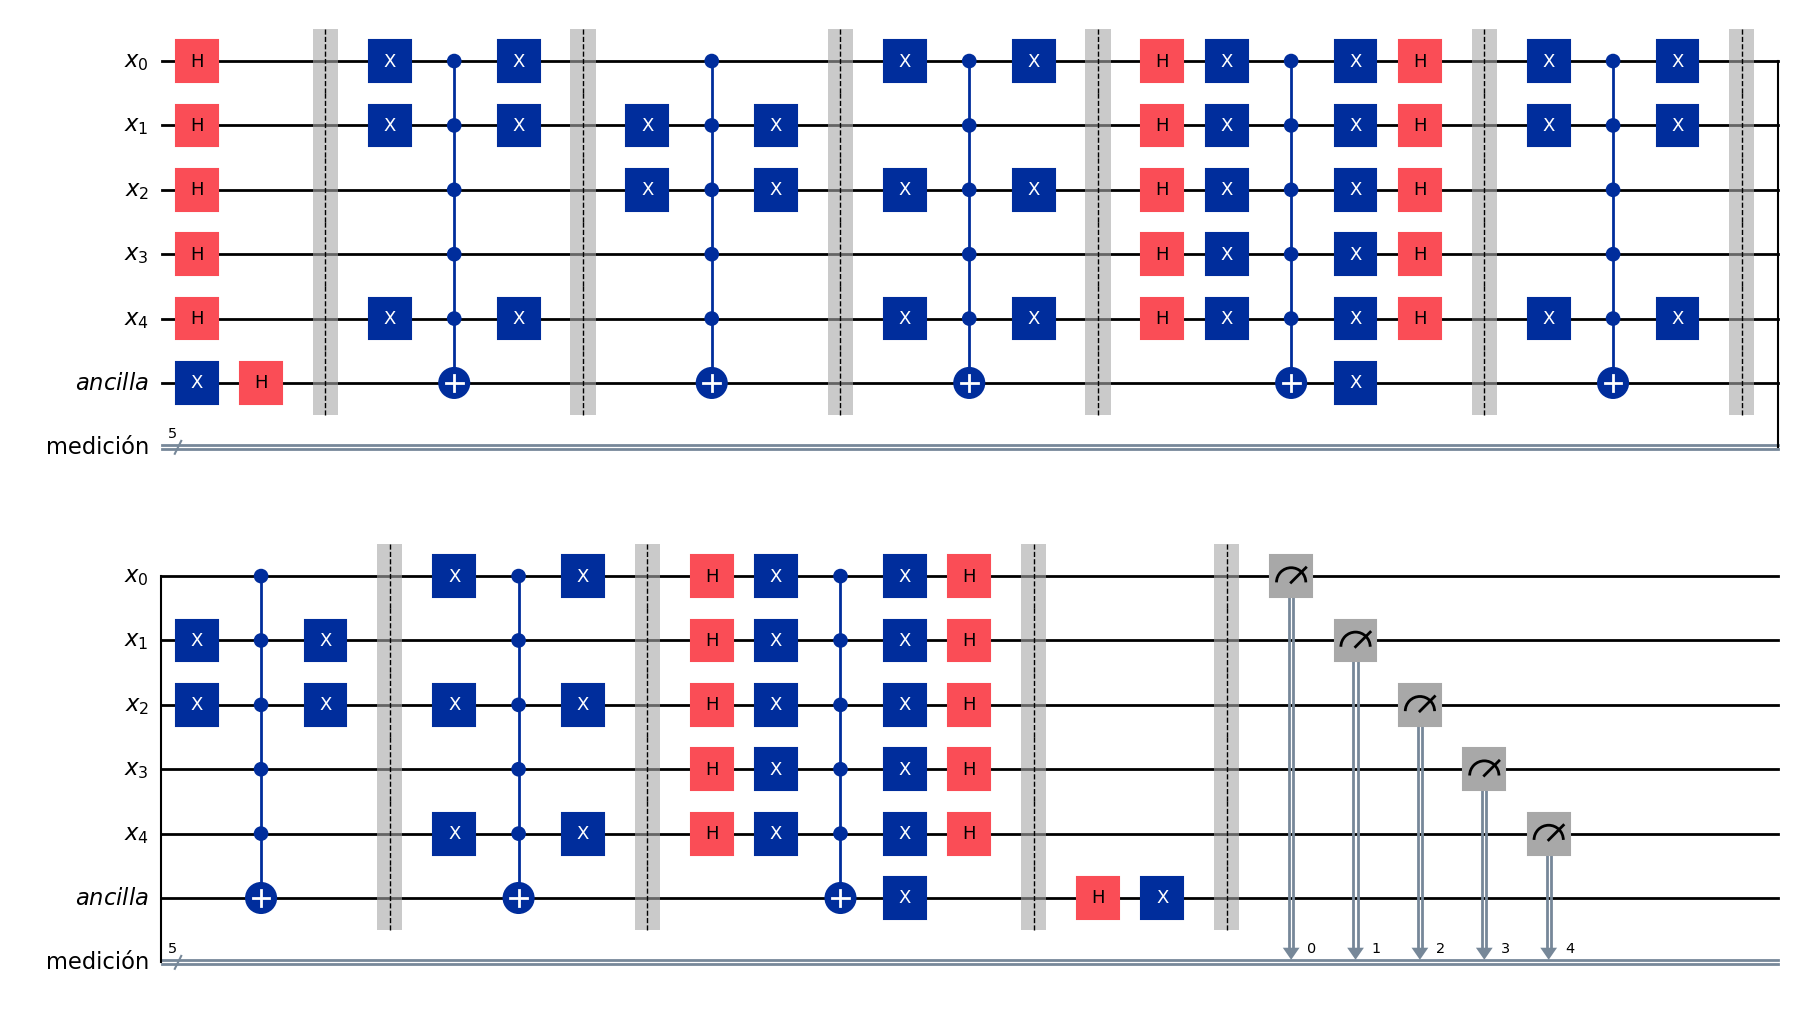

In [9]:
grover(Uf_01100_11001_01010, n=5, iterations=2)

Con la implementación del Algoritmo de Grover, se ralealizó la Busqueda de los elementos  $|01100\rangle$, $|11001\rangle$ y $|01010\rangle$. Al simular, los resultados fueron exitos. Aunque con cada ejecucición los valores de las probabilidades de busqueda cambian ligeramente.Los valores de probabilidad obtenidos en ese momento fueron:
1. $|01100\rangle$ con probabilidad $0.3288$
2. $|11001\rangle$ con probabilidad $0.3444$
3. $|01010\rangle$ con probabilidad $0.3268$


#### 3. Descubre los elementos marcados en un circuito más grande.

Para este ejercicio se provee una gran parte de la implementación del algoritmo de Grover, deberás completar algunos aspectos solamente (fíjate en las líneas con comentarios que comienzan con `???`).
   
Ejecuta la siguiente celda de código, esta definirá dos funciones:
    - `big_oraculo(circuito, qreg)`: define un oráculo que marca **dos** elementos, recibe el circuito al que se le aplicará el oráculo y el registro cuántico que contiene todos los qubits del circuito.
    - `big_inversion(circuito, qreg)`: define el operador de inversión para este caso particular, recibe el circuito al que se le aplicará la inversión y el registro cuántico que contiene todos los qubits del circuito.
   
   
Contesta a los siguientes incisos:
1. Determina el tamaño total del espacio de búsqueda, es decir, el valor de $N$.
    1. Observa cómo se está creando el circuito, se crean dos registros, uno cuántico y otro clásico, el tamaño del espacio de búsqueda es lo que medimos al final.
    2. Escribe en una celda de markdown el valor de $N$ de manera explícita, para que quede claro cual es tu respuesta a este inciso.
2. Encuentra el número óptimo de iteraciones.
    1. Una vez que determines $N$ podrás calcular la cantidad de iteraciones.
    2. Toma encuenta que el oráculo marca $2$ elementos, este valor te sirve para calcular la cantidad de iteraciones.
    3. Escribe en una celda de markdown la cantidad de iteraciones que calculaste, así como qué hiciste para determinar esa cantidad.
3. Realiza la simulación del circuito usando la clase `StatevectorSampler` (como en el ejemplo de este Lab5).
    1. Debes crear el objeto correcto.
    2. Debes obtener los conteos de la ejecución.
    - Está prohibido usar Qiskit Aer (`qiskit-aer`). Muchos ejemplos en internet usan Qiskit Aer, pero no se puede usar en las tareas, así que realiza la adecuación pertinente del código.
4. Indica cuáles son los elementos que encuentra el algoritmo de Grover.
    1. Revisa lo que imprime el código al final y deberás notar claramente $2$ elementos con una cantidad mayor de conteos.
    2. Indica explícitamente en una celda de markdown cuáles son los elementos encontrados.
    3. Convierte las cadenas de bits en su equivalente en decimal, también escribe este equivalente en markdown.

Celda oculta que define las funciones `big_oraculo(circuito, qreg)` y `big_inversion(circuito, qreg)`

No olvides ejecutar la siguiente celda de código ([ofuscado](https://es.wikipedia.org/wiki/Ofuscaci%C3%B3n#Motivaci%C3%B3n)) para cargar las funciones que definen el oráculo y el operador de inversión.

In [10]:
exec(bytes.fromhex('0a646566206269675f6f726163756c6f286369726375697439392c207175616e74756d5f726567293a0a202020206e756d626572733d5b31322c2034355d0a20202020666f72206e756d62657220696e206e756d626572733a0a20202020202020206966286e756d6265722532203d3d2030293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b305d290a20202020202020206966286e756d6265722534203c2032293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b315d290a20202020202020206966286e756d6265722538203c2034293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b325d290a20202020202020206966286e756d626572253136203c2038293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b335d290a20202020202020206966286e756d626572253332203c203136293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b345d290a20202020202020206966286e756d626572253634203c203332293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b355d290a20202020202020206966286e756d62657225313238203c203634293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b365d290a20202020202020206966286e756d62657225323536203c20313238293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b375d290a20202020202020206966286e756d62657225353132203c20323536293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b385d290a20202020202020206966286e756d626572203c20353132293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b395d290a0a20202020202020206369726375697439392e636378287175616e74756d5f7265675b305d2c207175616e74756d5f7265675b315d2c207175616e74756d5f7265675b31385d290a20202020202020206369726375697439392e636378287175616e74756d5f7265675b325d2c207175616e74756d5f7265675b335d2c207175616e74756d5f7265675b31315d290a20202020202020206369726375697439392e636378287175616e74756d5f7265675b345d2c207175616e74756d5f7265675b355d2c207175616e74756d5f7265675b31325d290a20202020202020206369726375697439392e636378287175616e74756d5f7265675b365d2c207175616e74756d5f7265675b375d2c207175616e74756d5f7265675b31335d290a20202020202020206369726375697439392e636378287175616e74756d5f7265675b385d2c207175616e74756d5f7265675b395d2c207175616e74756d5f7265675b31345d290a0a20202020202020206369726375697439392e636378287175616e74756d5f7265675b31385d2c207175616e74756d5f7265675b31315d2c207175616e74756d5f7265675b31355d290a20202020202020206369726375697439392e636378287175616e74756d5f7265675b31325d2c207175616e74756d5f7265675b31335d2c207175616e74756d5f7265675b31365d290a0a20202020202020206369726375697439392e636378287175616e74756d5f7265675b31355d2c207175616e74756d5f7265675b31365d2c207175616e74756d5f7265675b31375d290a20202020202020206369726375697439392e636378287175616e74756d5f7265675b31345d2c207175616e74756d5f7265675b31375d2c207175616e74756d5f7265675b31305d290a20202020202020206369726375697439392e636378287175616e74756d5f7265675b31355d2c207175616e74756d5f7265675b31365d2c207175616e74756d5f7265675b31375d290a0a20202020202020206369726375697439392e636378287175616e74756d5f7265675b31325d2c207175616e74756d5f7265675b31335d2c207175616e74756d5f7265675b31365d290a20202020202020206369726375697439392e636378287175616e74756d5f7265675b31385d2c207175616e74756d5f7265675b31315d2c207175616e74756d5f7265675b31355d290a0a20202020202020206369726375697439392e636378287175616e74756d5f7265675b385d2c207175616e74756d5f7265675b395d2c207175616e74756d5f7265675b31345d290a20202020202020206369726375697439392e636378287175616e74756d5f7265675b365d2c207175616e74756d5f7265675b375d2c207175616e74756d5f7265675b31335d290a20202020202020206369726375697439392e636378287175616e74756d5f7265675b345d2c207175616e74756d5f7265675b355d2c207175616e74756d5f7265675b31325d290a20202020202020206369726375697439392e636378287175616e74756d5f7265675b325d2c207175616e74756d5f7265675b335d2c207175616e74756d5f7265675b31315d290a20202020202020206369726375697439392e636378287175616e74756d5f7265675b305d2c207175616e74756d5f7265675b315d2c207175616e74756d5f7265675b31385d290a0a20202020202020206966286e756d6265722532203d3d2030293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b305d290a20202020202020206966286e756d6265722534203c2032293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b315d290a20202020202020206966286e756d6265722538203c2034293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b325d290a20202020202020206966286e756d626572253136203c2038293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b335d290a20202020202020206966286e756d626572253332203c203136293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b345d290a20202020202020206966286e756d626572253634203c203332293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b355d290a20202020202020206966286e756d62657225313238203c203634293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b365d290a20202020202020206966286e756d62657225323536203c20313238293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b375d290a20202020202020206966286e756d62657225353132203c20323536293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b385d290a20202020202020206966286e756d626572203c20353132293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b395d290a20202020'))

exec(bytes.fromhex('0a646566206269675f696e76657273696f6e286369726375697439392c207175616e74756d5f726567293a0a20202020666f72206920696e2072616e6765283130293a0a20202020202020206369726375697439392e68287175616e74756d5f7265675b695d290a20202020202020206369726375697439392e78287175616e74756d5f7265675b695d290a0a202020206369726375697439392e636378287175616e74756d5f7265675b305d2c207175616e74756d5f7265675b315d2c207175616e74756d5f7265675b31385d290a202020206369726375697439392e636378287175616e74756d5f7265675b325d2c207175616e74756d5f7265675b335d2c207175616e74756d5f7265675b31315d290a202020206369726375697439392e636378287175616e74756d5f7265675b345d2c207175616e74756d5f7265675b355d2c207175616e74756d5f7265675b31325d290a202020206369726375697439392e636378287175616e74756d5f7265675b365d2c207175616e74756d5f7265675b375d2c207175616e74756d5f7265675b31335d290a202020206369726375697439392e636378287175616e74756d5f7265675b385d2c207175616e74756d5f7265675b395d2c207175616e74756d5f7265675b31345d290a202020200a202020206369726375697439392e636378287175616e74756d5f7265675b31385d2c207175616e74756d5f7265675b31315d2c207175616e74756d5f7265675b31355d290a202020206369726375697439392e636378287175616e74756d5f7265675b31325d2c207175616e74756d5f7265675b31335d2c207175616e74756d5f7265675b31365d290a202020200a202020206369726375697439392e636378287175616e74756d5f7265675b31355d2c207175616e74756d5f7265675b31365d2c207175616e74756d5f7265675b31375d290a202020206369726375697439392e636378287175616e74756d5f7265675b31345d2c207175616e74756d5f7265675b31375d2c207175616e74756d5f7265675b31305d290a202020206369726375697439392e636378287175616e74756d5f7265675b31355d2c207175616e74756d5f7265675b31365d2c207175616e74756d5f7265675b31375d290a202020200a202020206369726375697439392e636378287175616e74756d5f7265675b31325d2c207175616e74756d5f7265675b31335d2c207175616e74756d5f7265675b31365d290a202020206369726375697439392e636378287175616e74756d5f7265675b31385d2c207175616e74756d5f7265675b31315d2c207175616e74756d5f7265675b31355d290a202020200a202020206369726375697439392e636378287175616e74756d5f7265675b385d2c207175616e74756d5f7265675b395d2c207175616e74756d5f7265675b31345d290a202020206369726375697439392e636378287175616e74756d5f7265675b365d2c207175616e74756d5f7265675b375d2c207175616e74756d5f7265675b31335d290a202020206369726375697439392e636378287175616e74756d5f7265675b345d2c207175616e74756d5f7265675b355d2c207175616e74756d5f7265675b31325d290a202020206369726375697439392e636378287175616e74756d5f7265675b325d2c207175616e74756d5f7265675b335d2c207175616e74756d5f7265675b31315d290a202020206369726375697439392e636378287175616e74756d5f7265675b305d2c207175616e74756d5f7265675b315d2c207175616e74756d5f7265675b31385d290a0a20202020666f72206920696e2072616e6765283130293a0a20202020202020206369726375697439392e78287175616e74756d5f7265675b695d290a20202020202020206369726375697439392e68287175616e74756d5f7265675b695d290a202020200a202020206369726375697439392e78287175616e74756d5f7265675b31305d290a20202020'))

##### Código Completo del Algoritmo de Grover

In [12]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.primitives import StatevectorSampler

qreg_big = QuantumRegister(19)               # nota que no hay un registro separado para la ancilla u otros qubits auxiliares
creg_big = ClassicalRegister(10, "med")      # la medición se llama 'med', necesario saberlo para la simulación con StatevectorSampler

big_grover = QuantumCircuit(qreg_big, creg_big)



# paso inicial - igual superposición
                                            # debido a que la ancilla no está separada, 
                                            # debemos indicar a cuántos qubits aplicar H
for i in range(10):                           # ??? completa esta línea <- aquí usa la respuesta del inciso A
    big_grover.h(qreg_big[i])



# iniciar ancilla en |->
                                            # inicia el qubit que está inmediatamente después de los qubits
                                            # que representan los elementos (los que se pusieron en superposición)
big_grover.x(qreg_big[10])                  # ??? indica el indice correcto (solo es uno) <- aquí usa la respuesta del inciso A
big_grover.h(qreg_big[10])                  # ??? indica el indice correcto (solo es uno) <- aquí usa la respuesta del inciso A



# Iteraciones de Grover
         
iteraciones = 17                              # ??? completa esta línea <- aquí usa la respuesta del inciso B

for i in range(iteraciones):

    # consulta (query)
    big_oraculo(big_grover, qreg_big)       # recibe el circuito y el registro cuántico

    # inversión
    big_inversion(big_grover, qreg_big)     # recibe el circuito y el registro cuántico



# regresar el ancilla a |0>
                                            # inicia el qubit que está inmediatamente después de los qubits
                                            # que representan los elementos 
big_grover.h(qreg_big[10])                  # ??? indica el indice correcto (solo es uno) <- aquí usa la respuesta del inciso A
big_grover.x(qreg_big[10])                  # ??? indica el indice correcto (solo es uno) <- aquí usa la respuesta del inciso A



# medición
                                            # debido a que la ancilla no está separada, 
                                            # debemos indicar cuántos qubits medir
for i in range(10):                         # ??? completa esta línea <- aquí usa la respuesta del inciso A
    big_grover.measure(qreg_big[i], creg_big[i])



# simulación
sampler = StatevectorSampler()              # ??? crear objeto de tipo StatevectorSampler, completa esta línea (inciso C)

shots = 2500                                # puedes usar otra cantidad de shots

job_sampler = sampler.run([big_grover], shots=shots)
conteos = job_sampler.result()[0].data.med.get_counts()                     # ??? obtén los conteos, completa esta línea (inciso C)



# imprimir los resultados obtenidos de la simulación
for bitstring in conteos:
    print(bitstring, "es observado", conteos[bitstring], "veces")  # esto te sirve para contestar el inciso D


0000101101 es observado 1280 veces
0000001100 es observado 1220 veces


##### Determina el tamaño total del espacio de búsqueda, es decir, el valor de $N$.

El tamaño total del espacio de búsqueda, esta siendo indirectamente descrito con los bits cásicos dentro del circuito. Debido a que son los bits que están encargados de realizar la medición de los $N$ elementos de Búsqueda.

Por lo que:

$N = 2^{10} = 1024$

##### Determina el tamaño total del espacio de búsqueda, es decir, el valor de $N$.

Al tener un valor de $N = 2^{10}$ y $2$ elementos marcados. El siguiente valor es el sisguiente:

El número de iteraciones a realizar es: $\pi \dfrac{\sqrt{\frac{2^{10}}{2}}}{4} = 17.77 \approx 17$

Por lo tanto, se van a realizar $17$ iteraciones

##### Indica cuáles son los elementos que encuentra el algoritmo de Grover.

Después de la ejecución del código del algoritmo de Grover muestra dos resultados específicos
1. $0000101101$ 
2. $0000001100$

El valor en decimal de cada cadena de bits es el siguiente:
1. $0000101101 = 45$
2. $0000001100 = 12$
